In [1]:
# Create the dataset as lists
import pandas as pd
newspapers = [
    "Baltimore Sun", "Boston Globe", "Boston Herald", "Charlotte Observer",
    "Chicago Sun Times", "Chicago Tribune", "Cincinnati Enquirer", "Denver Post",
    "Des Moines Register", "Hartford Courant", "Houston Chronicle", "Kansas City Star",
    "Los Angeles Daily News", "Los Angeles Times", "Miami Herald", "Minneapolis Star Tribune",
    "New Orleans Times-Picayune", "New York Daily News", "New York Times", "Newsday",
    "Omaha World Herald", "Orange County Register", "Philadelphia Inquirer", "Pittsburgh Press",
    "Portland Oregonian", "Providence Journal-Bulletin", "Rochester Democrat & Chronicle",
    "Rocky Mountain News", "Sacramento Bee", "San Francisco Chronicle", "St. Louis Post-Dispatch",
    "St. Paul Pioneer Press", "Tampa Tribune", "Washington Post"
]
# Load the data from the Excel file
data = pd.read_excel("newspaper_data_updated.xlsx")

# Extract features (daily circulation) and target (Sunday circulation)
daily_sales= data["Daily"].values
sunday_sales  = data["Sunday"].values


# Calculate the mean of daily and Sunday sales
mean_daily_sales = sum(daily_sales) / len(daily_sales)
mean_sunday_sales = sum(sunday_sales) / len(sunday_sales)
# Calculate the coefficients
numerator = sum([(daily_sales[i] - mean_daily_sales) * (sunday_sales[i] - mean_sunday_sales) for i in range(len(daily_sales))])
denominator = sum([(daily_sales[i] - mean_daily_sales) ** 2 for i in range(len(daily_sales))])

slope = numerator / denominator
intercept = mean_sunday_sales - (slope * mean_daily_sales)

# Define the linear regression function
def linear_regression(x):
    return intercept + slope * x

# Make predictions
daily_sales_value = 500
predicted_sunday_sales = linear_regression(daily_sales_value)

# Print the coefficients and prediction
print(f'Intercept: {intercept}')
print(f'Coefficient (Slope): {slope}')
print(f'Predicted Sunday Sales for {daily_sales_value} Daily Sales: {predicted_sunday_sales}')


Intercept: 13.835629909636395
Coefficient (Slope): 1.339714757684125
Predicted Sunday Sales for 500 Daily Sales: 683.6930087516989


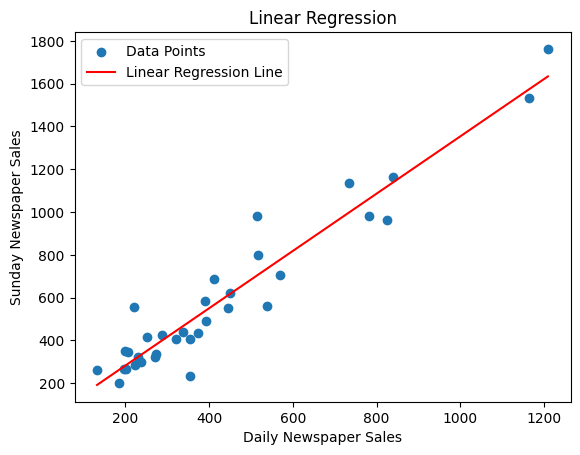

In [2]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data points
plt.scatter(daily_sales, sunday_sales, label='Data Points')

# Plot the linear regression line
x_values = range(int(min(daily_sales)), int(max(daily_sales)) + 1)
y_values = [linear_regression(x) for x in x_values]
plt.plot(x_values, y_values, color='red', label='Linear Regression Line')

# Set labels and title
plt.xlabel('Daily Newspaper Sales')
plt.ylabel('Sunday Newspaper Sales')
plt.title('Linear Regression')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [3]:
# Calculate minimum, maximum, and average daily sales
min_daily_sales = min(daily_sales)
max_daily_sales = max(daily_sales)
avg_daily_sales = sum(daily_sales) / len(daily_sales)

# Calculate thresholds for each case
threshold_min = min_daily_sales * 1.3  # 30% above the minimum daily sales
threshold_max = max_daily_sales * 1.3  # 30% above the maximum daily sales
threshold_avg = avg_daily_sales * 1.3  # 30% above the average daily sales

# Create a dictionary to store the results for each case
results = {
    "Minimum Sales": [],
    "Maximum Sales": [],
    "Average Sales": []
}

# Loop through the data and check if each newspaper satisfies the threshold for each case
for i in range(len(newspapers)):
    newspaper = newspapers[i]
    predicted_sunday_sales = linear_regression(daily_sales[i])

    # Check if the predicted Sunday sales satisfy the threshold for each case
    min_case = predicted_sunday_sales >= threshold_min
    max_case = predicted_sunday_sales >= threshold_max
    avg_case = predicted_sunday_sales >= threshold_avg

    results["Minimum Sales"].append((newspaper, min_case))
    results["Maximum Sales"].append((newspaper, max_case))
    results["Average Sales"].append((newspaper, avg_case))

for case, newspapers_list in results.items():
    print(f"Newspapers that should not circulate for {case}:")
    for newspaper, should_not_circulate in newspapers_list:
        if not should_not_circulate:
            print(f"- {newspaper}")
    print()


Newspapers that should not circulate for Minimum Sales:

Newspapers that should not circulate for Maximum Sales:
- Baltimore Sun
- Boston Globe
- Boston Herald
- Charlotte Observer
- Chicago Sun Times
- Chicago Tribune
- Cincinnati Enquirer
- Denver Post
- Des Moines Register
- Hartford Courant
- Houston Chronicle
- Kansas City Star
- Los Angeles Daily News
- Miami Herald
- Minneapolis Star Tribune
- New Orleans Times-Picayune
- New York Daily News
- Newsday
- Omaha World Herald
- Orange County Register
- Philadelphia Inquirer
- Pittsburgh Press
- Portland Oregonian
- Providence Journal-Bulletin
- Rochester Democrat & Chronicle
- Rocky Mountain News
- Sacramento Bee
- San Francisco Chronicle
- St. Louis Post-Dispatch
- St. Paul Pioneer Press
- Tampa Tribune
- Washington Post

Newspapers that should not circulate for Average Sales:
- Baltimore Sun
- Boston Herald
- Charlotte Observer
- Cincinnati Enquirer
- Denver Post
- Des Moines Register
- Hartford Courant
- Kansas City Star
- Los An

In [6]:
import pandas as pd

# Load the data from the Excel file
data1= pd.read_excel("newspaper_data.xlsx")

# Extract features (daily circulation) and target (Sunday circulation)
daily_sales = data1["Daily Circulation"].values



# Create a dictionary to store the results for each case
results = {
    "Minimum Sales": [],
    "Maximum Sales": [],
    "Average Sales": []
}

# Loop through the data and check if each newspaper satisfies the threshold for each case
for index, row in data1.iterrows():
    newspaper = row["Newspaper"]
    daily_sales_value = row["Daily Circulation"]
    predicted_sunday_sales = linear_regression(daily_sales_value)

    # Check if the predicted Sunday sales satisfy the threshold for each case
    min_case = predicted_sunday_sales >= threshold_min
    max_case = predicted_sunday_sales >= threshold_max
    avg_case = predicted_sunday_sales >= threshold_avg

    results["Minimum Sales"].append((newspaper, min_case))
    results["Maximum Sales"].append((newspaper, max_case))
    results["Average Sales"].append((newspaper, avg_case))

# Print the newspapers that should not circulate their Sunday editions for each case
for case, newspapers_list in results.items():
    print(f"Newspapers that should not circulate for {case}:")
    for newspaper, should_not_circulate in newspapers_list:
        if not should_not_circulate:
            print(f"- {newspaper}")
    print()


Newspapers that should not circulate for Minimum Sales:

Newspapers that should not circulate for Maximum Sales:
- Baltimore Sun
- Boston Globe
- Boston Herald
- Charlotte Observer
- Chicago Sun Times
- Chicago Tribune
- Cincinnati Enquirer
- Denver Post
- Des Moines Register
- Hartford Courant
- Houston Chronicle
- Kansas City Star
- Los Angeles Daily News
- Miami Herald
- Minneapolis Star Tribune
- New Orleans Times-Picayune
- New York Daily News
- Newsday
- Omaha World Herald
- Orange County Register
- Philadelphia Inquirer
- Pittsburgh Press
- Portland Oregonian
- Providence Journal-Bulletin
- Rochester Democrat & Chronicle
- Rocky Mountain News
- Sacramento Bee
- San Francisco Chronicle
- St. Louis Post-Dispatch
- St. Paul Pioneer Press
- Tampa Tribune
- Washington Post

Newspapers that should not circulate for Average Sales:
- Baltimore Sun
- Boston Herald
- Charlotte Observer
- Cincinnati Enquirer
- Denver Post
- Des Moines Register
- Hartford Courant
- Kansas City Star
- Los An